
--- Dataset Preview ---
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

--- Dataset Shape ---
Rows: 768  | Columns: 9

--- Column Names ---
['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

--- Data Types ---
Pregnancies                   int64
Glucose                     

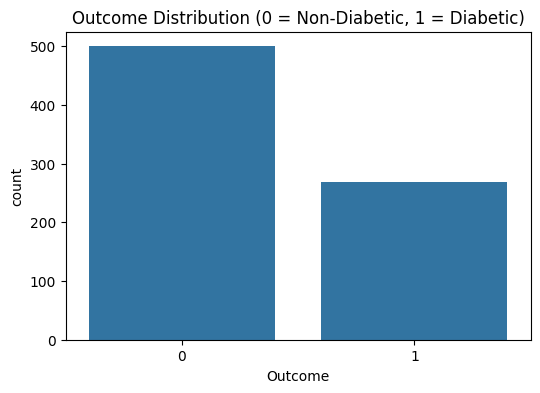

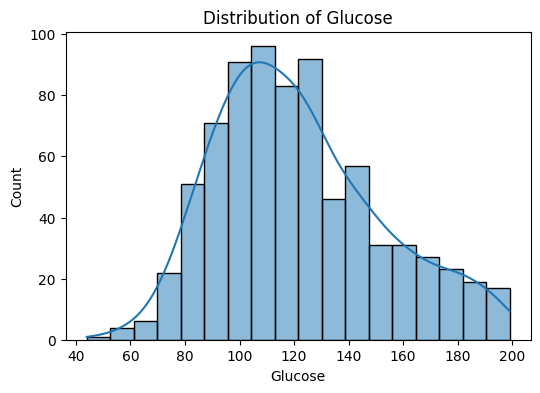

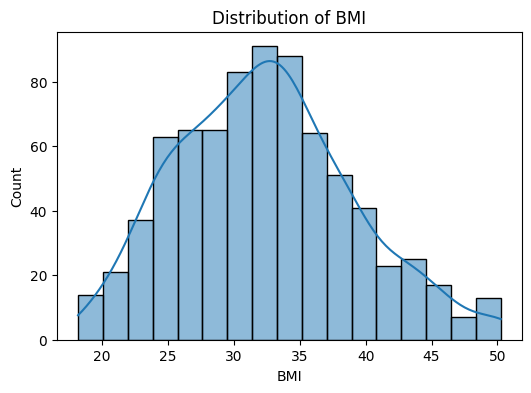

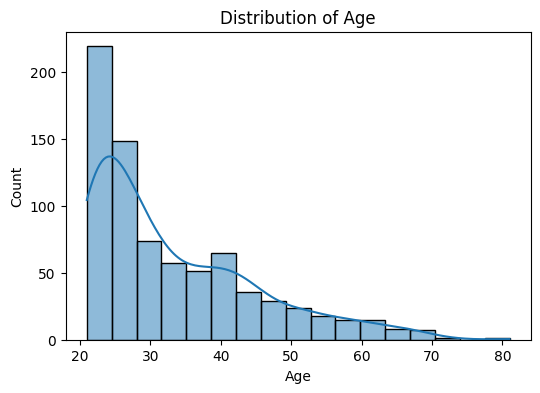

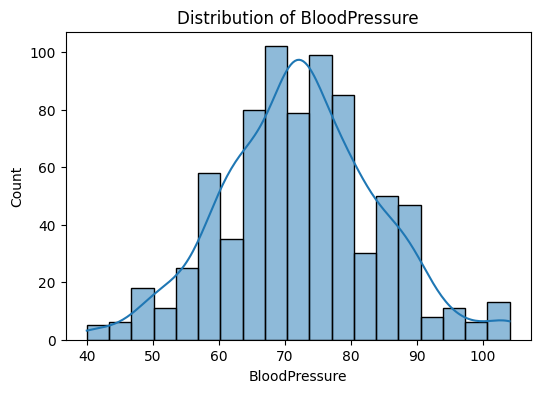

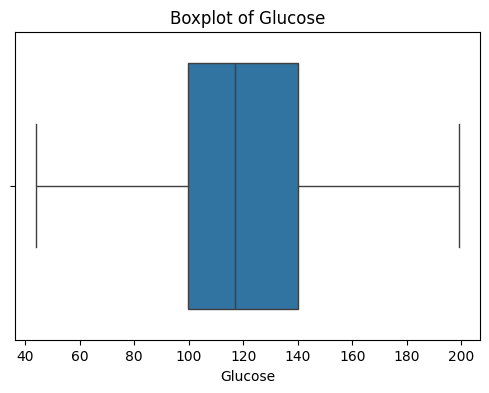

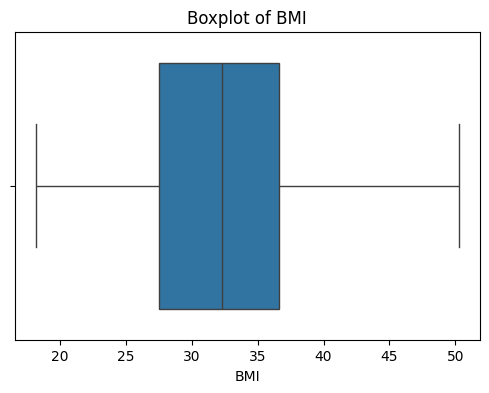

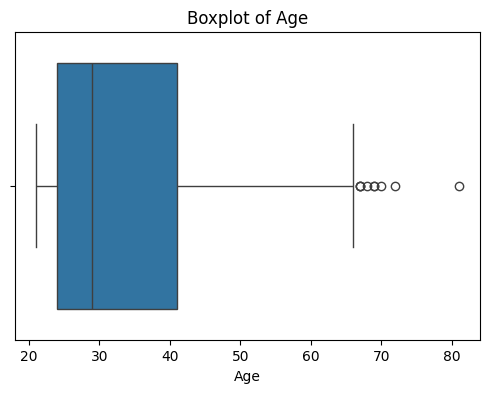

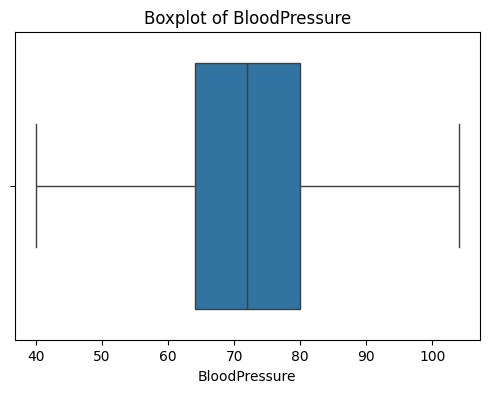

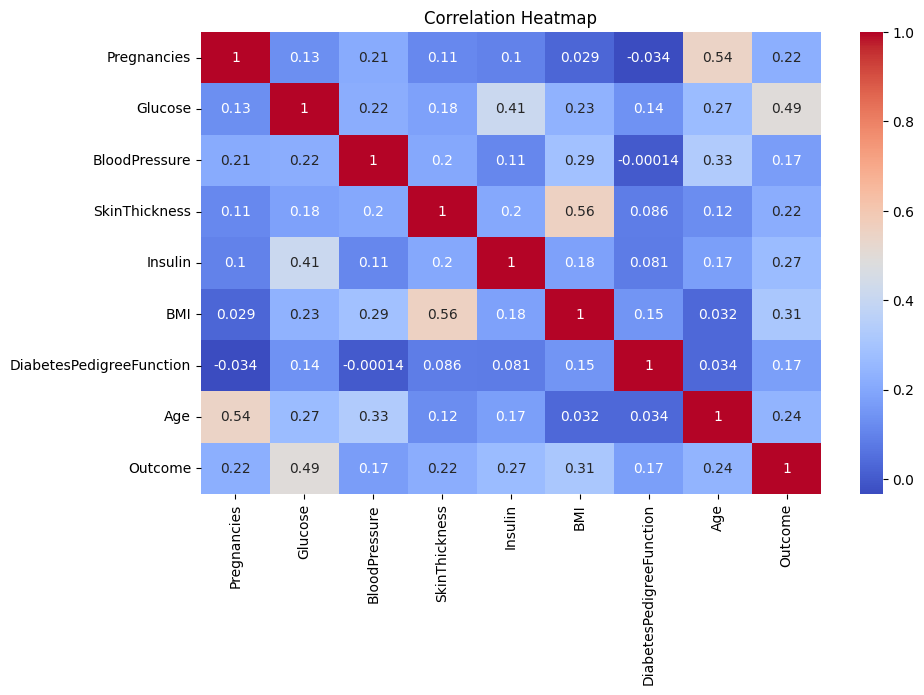


--- Feature Engineering Started ---

--- Correlation with Outcome ---
Outcome                     1.000000
Glucose                     0.492782
BMI                         0.312811
Insulin                     0.267811
Age                         0.238356
Pregnancies                 0.221898
SkinThickness               0.220111
DiabetesPedigreeFunction    0.173844
BloodPressure               0.168971
Name: Outcome, dtype: float64

--- Model Building Started ---

--- Model Evaluation ---
Accuracy: 80.5 %

Confusion Matrix:
 [[74 25]
 [14 87]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.75      0.79        99
           1       0.78      0.86      0.82       101

    accuracy                           0.81       200
   macro avg       0.81      0.80      0.80       200
weighted avg       0.81      0.81      0.80       200


--- Diabetes Prediction ---
Enter the following health details:
Number of Pregnancies: 3
Glucose Le

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
# *******************************************************
# Project Title : Diabetes Prediction using Machine Learning
# Student Name  : Pranav Chaudhari , Digvijay Birajdar , Tanmay Talreja , Gaurav Jaypatre
# PRN           : 124B1B027 , 124B1B013 , 124B1B034 , 124B1B025
# College       : Pimpri Chinchwad College of Engineering, Pune
# *******************************************************

# ------------------------------
# STEP 0 : Import Required Libraries
# ------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier

# -------------------------------------------------------
# STEP 1 : Load the Dataset
# -------------------------------------------------------
data = pd.read_csv("diabetes.csv")

print("\n--- Dataset Preview ---")
print(data.head())

print("\n--- Dataset Shape ---")
print("Rows:", data.shape[0], " | Columns:", data.shape[1])

print("\n--- Column Names ---")
print(list(data.columns))

print("\n--- Data Types ---")
print(data.dtypes)

print("\n--- Missing Values Count ---")
print(data.isnull().sum())

print("\n--- Duplicate Values ---")
print("Duplicates Found:", data.duplicated().sum())

# -------------------------------------------------------
# STEP 2 : Data Preprocessing / Transformation (ETL)
# -------------------------------------------------------
print("\n--- Data Preprocessing Started ---")

# 2.1 Replace invalid zeros with NaN for specific columns
cols_with_zero = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
for col in cols_with_zero:
    data[col] = data[col].replace(0, np.nan)
    data[col] = data[col].fillna(data[col].median())

# 2.2 Remove or cap outliers using IQR method
for col in cols_with_zero:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    data[col] = np.where(data[col] < lower, lower, data[col])
    data[col] = np.where(data[col] > upper, upper, data[col])

# 2.3 Feature Transformation - Log transform for skewed data
data["Insulin"] = np.log1p(data["Insulin"])

# -------------------------------------------------------
# STEP 3 : Exploratory Data Analysis (EDA)
# -------------------------------------------------------
print("\n--- EDA Started ---")

print("\n--- Statistical Summary ---")
print(data.describe())

# 3.1 Target Variable Distribution
plt.figure(figsize=(6,4))
sns.countplot(x=data["Outcome"])
plt.title("Outcome Distribution (0 = Non-Diabetic, 1 = Diabetic)")
plt.show()

# 3.2 Feature Distributions
features = ['Glucose', 'BMI', 'Age', 'BloodPressure']
for f in features:
    plt.figure(figsize=(6,4))
    sns.histplot(data[f], kde=True)
    plt.title(f"Distribution of {f}")
    plt.show()

# 3.3 Outlier Visualization
for f in features:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=data[f])
    plt.title(f"Boxplot of {f}")
    plt.show()

# 3.4 Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(), cmap="coolwarm", annot=True)
plt.title("Correlation Heatmap")
plt.show()

# -------------------------------------------------------
# STEP 4 : Feature Engineering / Statistical Observations
# -------------------------------------------------------
print("\n--- Feature Engineering Started ---")

# 4.1 Feature correlation with Outcome
corr_outcome = data.corr()["Outcome"].sort_values(ascending=False)
print("\n--- Correlation with Outcome ---")
print(corr_outcome)

# -------------------------------------------------------
# STEP 5 : Machine Learning Model (XGBoost Optimized)
# -------------------------------------------------------
print("\n--- Model Building Started ---")

# 5.1 Define features and target
X = data.drop("Outcome", axis=1)
y = data["Outcome"]

# 5.2 Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

# 5.3 Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 5.4 Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 5.5 XGBoost Model with Optimized Parameters
model = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.9,
    colsample_bytree=0.9,
    gamma=0.2,
    random_state=42
)
model.fit(X_train, y_train)

# 5.6 Model Evaluation
y_pred = model.predict(X_test)

print("\n--- Model Evaluation ---")
acc = round(accuracy_score(y_test, y_pred) * 100, 2)
print("Accuracy:", acc, "%")
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# -------------------------------------------------------
# STEP 6 : Diabetes Prediction for User Input
# -------------------------------------------------------
print("\n--- Diabetes Prediction ---")
print("Enter the following health details:")

preg = int(input("Number of Pregnancies: "))
glucose = float(input("Glucose Level: "))
bp = float(input("Blood Pressure: "))
skin = float(input("Skin Thickness: "))
insulin = float(input("Insulin Level: "))
bmi = float(input("BMI: "))
dpf = float(input("Diabetes Pedigree Function: "))
age = int(input("Age: "))

user_data = np.array([[preg, glucose, bp, skin, insulin, bmi, dpf, age]])
user_data = scaler.transform(user_data)
prediction = model.predict(user_data)

if prediction[0] == 1:
    print("\nPrediction: YES, the person is likely to have Diabetes.")
else:
    print("\nPrediction: NO, the person is not likely to have Diabetes.")

print("\nFinal Model Accuracy:", acc, "%")
print("\n--- Project Completed Successfully ---")

# *******************************************************
# End of Project
# *******************************************************
